## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
# !pip install mlxtend

## Importing Dataset

In [3]:
data = sm.datasets.fair.load_pandas().data

In [4]:
data.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


## Data Preprocessing

In [5]:
# In order to treat this problem as Classification problem, we have created a column "affair" 
# where 1[the woman has atleast 1 affair] and 0[the woman has no affair]

data["affair"] = (data.affairs > 0).astype(int)

In [6]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
y , X = dmatrices("affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)", data , return_type="dataframe")

In [8]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [9]:
X = X.rename(columns = {"C(occupation)[T.2.0]":"occ_2","C(occupation)[T.3.0]":"occ_3","C(occupation)[T.4.0]":"occ_4","C(occupation)[T.5.0]":"occ_5","C(occupation)[T.6.0]":"occ_6",
                       "C(occupation_husb)[T.2.0]":"occ_husb_2","C(occupation_husb)[T.3.0]":"occ_husb_3","C(occupation_husb)[T.4.0]":"occ_husb_4","C(occupation_husb)[T.5.0]":"occ_husb_5","C(occupation_husb)[T.6.0]":"occ_husb_6"})

In [10]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [11]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [12]:
# Combining X and y
df = pd.concat([X,y],axis=1)

In [13]:
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [14]:
# Checking the shape of dataframe
df.shape

(6366, 18)

In [15]:
# Checking whether null values are present in the dataset or not
df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affair           0
dtype: int64

In [16]:
# Describing the dataset
df.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,0.322495
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.467468
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


In [17]:
# Chech whether the dataset is balanced or not
df["affair"].value_counts()

0.0    4313
1.0    2053
Name: affair, dtype: int64

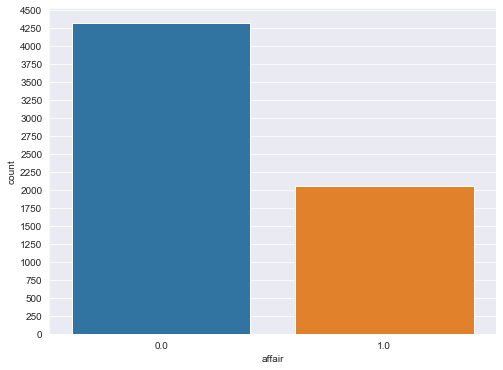

In [18]:
# PLOT
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x ='affair', data = df)
plt.yticks(range(0,4600,250))
plt.show()

## DATA VISUALIZATION

#### HOW NO. OF CHILDREN AFFECT THE MARRIAGE

C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


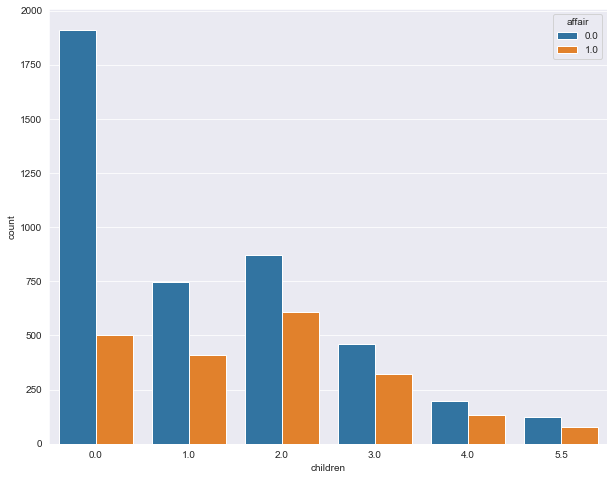

In [19]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("children" , data= df , hue = "affair")
plt.show()

#### HOW YEARS OF MARRIAGE AFFECT RELATIONSHIP BETWEEN A COUPLE

C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


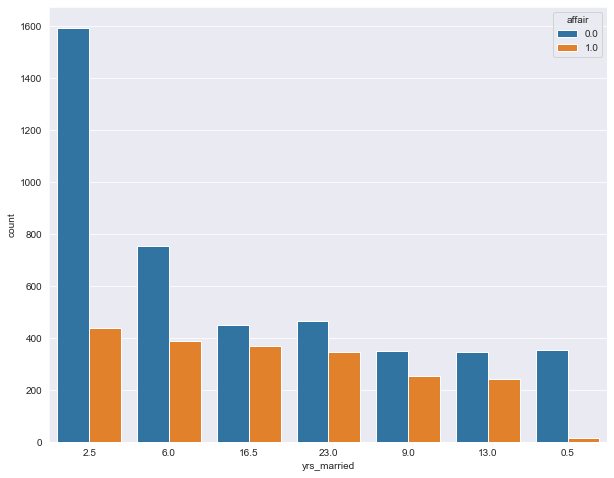

In [20]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("yrs_married" , data= df , hue = "affair",order=df["yrs_married"].value_counts().index)
plt.show()

#### HOW WOMEN RATE THEIR MARRIED LIFE ON A SCALE OF 1 TO 5

C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


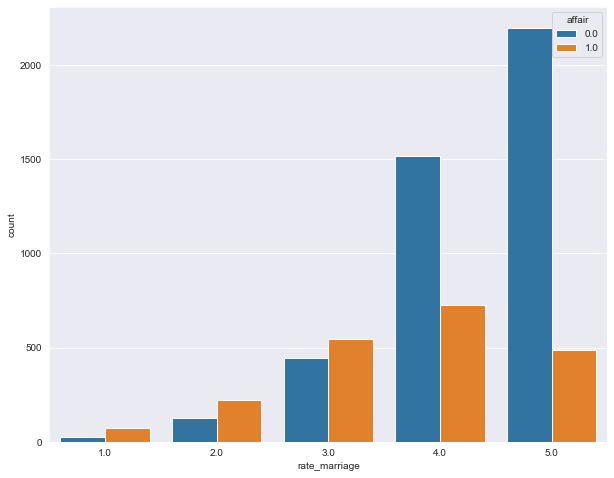

In [21]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("rate_marriage" , data= df , hue = "affair")
plt.show()

#### HOW EDUCATION IMPACTS THE MARRIAGE

C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


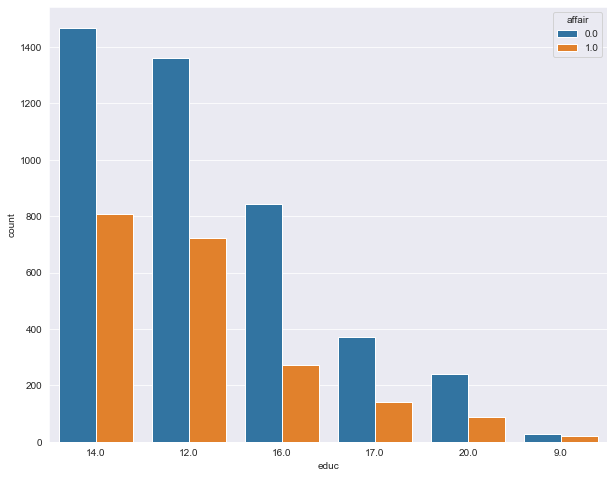

In [22]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("educ" , data= df , hue = "affair",order=df["educ"].value_counts().index)
plt.show()

#### DOES BEING RELIGIOUS IS RELATED TO AFAIR

C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


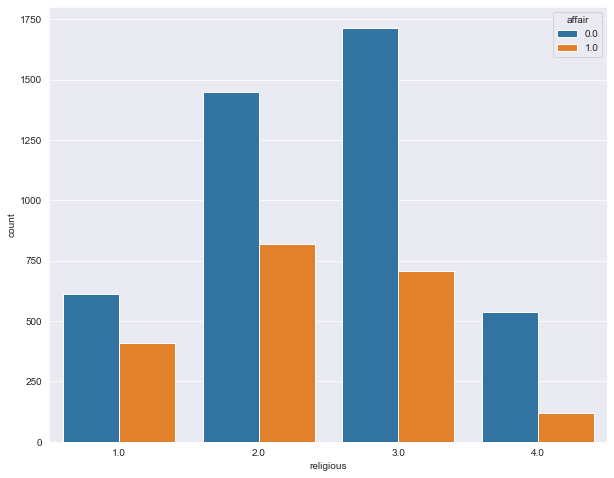

In [23]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("religious" , data= df , hue = "affair")
plt.show()

In [24]:
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [25]:
X = df.iloc[: , 1:-1]
y = df.iloc[: , -1]

In [26]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


## Splitting Dataset into Train and Test dataset

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state= 2)

In [28]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(4456, 16) (1910, 16) (4456,) (1910,)


## Feature Scaling

In [29]:
sc = StandardScaler()
X_train.iloc[:, 10:] = sc.fit_transform(X_train.iloc[:, 10:])
X_test.iloc[:, 10:] = sc.transform(X_test.iloc[:, 10:])

C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\Lenovo\anaconda3\envs\affairs_assignment\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [30]:
X_train.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
5335,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.111016,-0.304248,-0.004014,0.406220,-0.489402,-1.025415
3836,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.930433,-1.040296,-0.898429,0.406220,1.804944,-1.025415
5404,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.930433,1.167849,0.546394,0.406220,-0.489402,0.814057
5572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.930433,-0.304248,-0.898429,-0.970034,1.804944,-0.105679
6042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.111016,0.431801,0.546394,0.406220,1.804944,0.814057


In [31]:
X_train_res , y_train_res = SMOTE(random_state= 1).fit_resample(X_train, y_train)
X_test_res , y_test_res = SMOTE(random_state= 1).fit_resample(X_test, y_test)

In [32]:
print(X_train_res.shape , y_train_res.shape, X_test_res.shape , y_test_res.shape)

(6068, 16) (6068,) (2558, 16) (2558,)


## Feature Selection

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
forward_fs = sfs(rf , k_features=6,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)
forward_fs = forward_fs.fit(X_train_res , y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   26.1s finished

[2021-09-12 18:21:12] Features: 1/6 -- score: 0.6608501258334001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   25.7s finished

[2021-09-12 18:21:38] Features: 2/6 -- score: 0.7091387780103247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   25.1s finished

[2021-09-12 18:22:03] Features: 3/6 -- score: 0.7203461674799774[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [34]:
feat_names = list(forward_fs.k_feature_names_)

In [35]:
feat_names

['occ_husb_4',
 'occ_husb_5',
 'rate_marriage',
 'yrs_married',
 'children',
 'educ']

In [36]:
X_train_new = X_train_res[["rate_marriage", "yrs_married", "children", "educ"]]

X_test_new = X_test_res[["rate_marriage", "yrs_married", "children", "educ"]]

## MODELLING

In [37]:
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

In [38]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train_new, y_train_res)

print(model.best_estimator_)

LogisticRegression(C=1)


In [39]:
log_reg = LogisticRegression(C =1)
model_final = log_reg.fit(X_train_new, y_train_res)

In [40]:
print_Score(model_final, X_train_new, X_test_new, y_train_res, y_test_res, train=True)
print_Score(model_final, X_train_new, X_test_new, y_train_res, y_test_res, train=False)

Train Result:
Accuracy Score:66.76%
---------------------------------
Classification Report:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.656221     0.680768  0.667601     0.668495      0.668495
recall        0.704021     0.631180  0.667601     0.667601      0.667601
f1-score      0.679281     0.655037  0.667601     0.667159      0.667159
support    3034.000000  3034.000000  0.667601  6068.000000   6068.000000
-----------------------------------
Confusion Matrix:
[[2136  898]
 [1119 1915]]

Test Result:
Accuracy Score:66.54%
---------------------------------
Classification Report:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.651831     0.681545  0.665364     0.666688      0.666688
recall        0.709930     0.620797  0.665364     0.665364      0.665364
f1-score      0.679641     0.649755  0.665364     0.664698      0.664698
support    1279.000000  1279.000000  0.665364  2558.000000   2558.000000
---

In [43]:
pickle_out= open('Affairs.pkl','wb')
pickle.dump(log_reg ,pickle_out)
pickle_out.close()